In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import transforms, datasets, models
import numpy as np
import matplotlib.pyplot as plt
from torch.autograd import Variable
from collections import namedtuple
from IPython.display import Image
import time

from torch.utils import data

%matplotlib inline

np.random.seed(2019)
cuda = torch.cuda.is_available()
cuda

False

FashionMNIST

28x28 images

10 classes

Single color channel (B&W)

Centered objects

50000 training set members

10000 test set members




In [ ]:
'''
# Fashion Class that enables the Dataset download and basic transformations
class Fashion(datasets.FashionMNIST):
    def __init__(self, root, train=True, transform=None, target_transform=None, download=False):
        self.urls = [
            'http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-images-idx3-ubyte.gz',
            'http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-labels-idx1-ubyte.gz',
            'http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/t10k-images-idx3-ubyte.gz',
            'http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/t10k-labels-idx1-ubyte.gz',
        ]
        super(Fashion, self).__init__(
                 root, train=train, transform=transform, target_transform=target_transform, download=download
    )
'''
def decode_label(l):
    return ["Top",
     "Trouser",
     "Pullover",
     "Dress",
     "Coat",
     "Sandal",
     "Shirt",
     "Sneaker",
     "Bag",
     "Ankle boot"
    ][l]

In [ ]:
'''transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.1307,), (0.3081,))])
train_data = Fashion('./data', train=True, download=True, transform=transform)
test_data = Fashion('./data', train=False, download=True, transform=transform)
'''

#transform = transforms.ToTensor()
transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.1307,), (0.3081,))])
train_data = datasets.FashionMNIST('./data', train=True, download=True, transform=transform)
test_data = datasets.FashionMNIST('./data', train=False, download=True, transform=transform)

In [ ]:
X_train = train_data.data
X_train = train_data.transform(X_train.numpy())
print('[Train Data]')
print(' - Numpy Shape:', X_train.cpu().numpy().shape)
print(' - Tensor Shape:', X_train.size())
print(' - min:', torch.min(X_train))
print(' - max:', torch.max(X_train))
print(' - mean:', torch.mean(X_train))
print(' - std:', torch.std(X_train))
print(' - var:', torch.var(X_train))

print('\n[Train Labels]')
print(' - Numpy Shape:', train_data.targets.cpu().numpy().shape)
print(' - Tensor Shape:', train_data.targets.size())

[Train Data]
 - Numpy Shape: (28, 60000, 28)
 - Tensor Shape: torch.Size([28, 60000, 28])
 - min: tensor(-0.4242)
 - max: tensor(2.8215)
 - mean: tensor(0.5001)
 - std: tensor(1.1458)
 - var: tensor(1.3129)

[Train Labels]
 - Numpy Shape: (60000,)
 - Tensor Shape: torch.Size([60000])


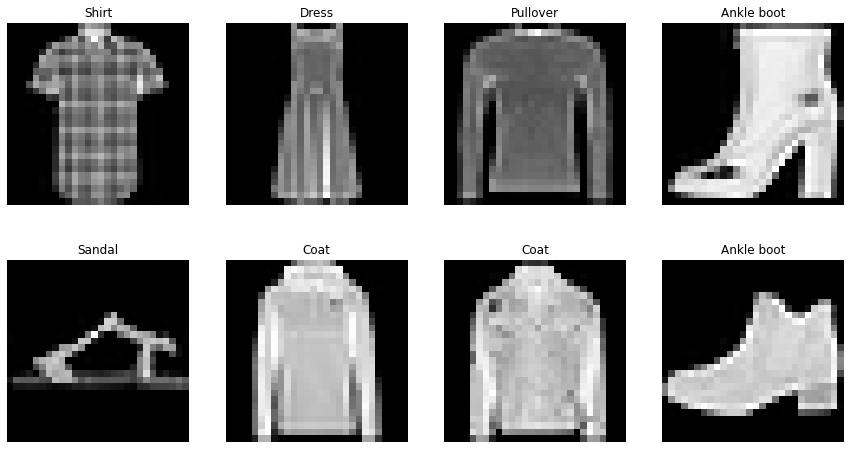

In [ ]:
idxs = np.random.randint(100, size=8)
_,a = plt.subplots(2, 4, figsize=(15, 8))
for i in range(8):
    X = train_data.data[idxs[i]]
    Y = train_data.targets[idxs[i]]
    r, c = i // 4, i % 4
    a[r][c].set_title(decode_label(Y))
    a[r][c].axis('off')
    a[r][c].imshow(X.numpy(),cmap='gray')
plt.show()

In [ ]:
class FashionModel(nn.Module):
    def __init__(self):
        super(FashionModel, self).__init__()
        self.fc1 = nn.Linear(784, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 10)
    
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.log_softmax(self.fc3(x),dim=1)
        return x
print(FashionModel())

FashionModel(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=32, bias=True)
  (fc3): Linear(in_features=32, out_features=10, bias=True)
)


In [ ]:
class MyDataset(data.Dataset):
    def __init__(self, X, Y):
        self.X = X
        self.Y = Y

    def __len__(self):
        return len(self.Y)

    def __getitem__(self,index):
        X = self.X[index].float().reshape(-1)
        Y = self.Y[index].long()
        return X,Y

In [ ]:
'''
train_dataset = MyDataset(train_data.data, train_data.targets)
test_dataset = MyDataset(test_data.data, test_data.targets)
                        
trainloader = torch.utils.data.DataLoader(train_data, batch_size=64,
                                          shuffle=True)
testloader = torch.utils.data.DataLoader(test_data, batch_size=64,
                                         shuffle=False, num_workers=2)
test_size = len(test_data.data)
train_size = len(train_data.data)
'''
'''
train_size = int(0.8 * len(train_data.data))
val_size = len(train_data.data) - train_size
train_dataset = MyDataset(train_data.data, train_data.targets)
train_dataset, val_dataset = torch.utils.data.random_split(train_dataset, [train_size, val_size])
num_workers = 8
test_size = len(test_data.data)
batch_size = 100

test_dataset = MyDataset(test_data.data, test_data.targets)

train_loader_args = dict(shuffle=True, batch_size=256, num_workers=num_workers, pin_memory=True) if cuda\
                    else dict(shuffle=True, batch_size=batch_size)
train_loader = data.DataLoader(train_dataset, **train_loader_args)

val_loader_args = dict(shuffle=True, batch_size=256, num_workers=num_workers, pin_memory=True) if cuda\
                    else dict(shuffle=True, batch_size=64)
val_loader = data.DataLoader(val_dataset, **val_loader_args)

test_loader_args = dict(shuffle=False, batch_size=256, num_workers=num_workers, pin_memory=True) if cuda\
                    else dict(shuffle=False, batch_size=batch_size)
test_loader = data.DataLoader(test_dataset, **test_loader_args)
'''

#Metric = namedtuple('Metric', ['loss', 'train_error', 'val_error'])


train_size = train_data.data.shape[0]
val_size, train_size = int(0.20 * train_size), int(0.80 * train_size) # 80 / 20 train-val split
test_size = test_data.data.shape[0]
batch_size = 100

# Add dataset to dataloader that handles batching
train_loader = torch.utils.data.DataLoader(train_data, 
                                            batch_size=batch_size,
                                           sampler=torch.utils.data.sampler.SubsetRandomSampler(np.arange(val_size, val_size+train_size)))
val_loader = torch.utils.data.DataLoader(train_data, 
                                           batch_size=batch_size, 
                                           sampler=torch.utils.data.sampler.SubsetRandomSampler(np.arange(0, val_size)))
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, shuffle=False)

# Setup metric class
Metric = namedtuple('Metric', ['Train_loss', 'Test_loss', 'Test_accuracy'])

In [ ]:
device = torch.device("cuda" if cuda else "cpu")
def inference(model, loader, n_members):
    with torch.no_grad():
      model.to(device)
      model.eval()
      running_loss = 0.0
      total_predictions = 0.0
      correct_predictions = 0.0
      for batch_idx, (data, target) in enumerate(loader):
        data = data.to(device)
        data = data.view(-1,784)
        target = target.to(device)
        outputs = model(data)
        #predicted = torch.argmax(outputs,dim = 1)
        _, predicted = torch.max(outputs.data, 1)
        total_predictions += target.size(0)
        correct_predictions += (predicted == target).sum().item()
        criterion = nn.CrossEntropyLoss()
        loss = criterion(outputs, target).detach()
        running_loss += loss.item()
      running_loss /= len(loader)
      acc = (correct_predictions/total_predictions)*100.0
      #print('Testing Loss: ', running_loss)
      #print('Testing Accuracy: ', acc, '%')
      return running_loss, acc
      

    
    '''correct = 0
    for data, label in loader:
        X = Variable(data.view(-1, 784))
        Y = Variable(label)
        out = model(X)
        pred = out.data.max(1, keepdim=True)[1]
        predicted = pred.eq(Y.data.view_as(pred))
        correct += predicted.sum()
    return correct.numpy() / n_members'''


In [ ]:
class Trainer():
    """ 
    A simple training cradle
    """
    
    def __init__(self, model, optimizer, load_path=None):
        self.model = model
        if load_path is not None:
            self.model = torch.load(load_path)
        self.optimizer = optimizer
            
    def save_model(self, path):
        torch.save(self.model.state_dict(), path)

    def run(self, epochs):

        print("Start Training...")
        self.metrics = []
        self.model.train()
        self.model.to(device)
        
        running_loss = 0.0
        start_time = time.time()
        for e in range(n_epochs):     
            
        
            running_loss = 0.0
            start_time = time.time()
            epoch_loss = 0
            correct = 0
            for batch_idx, (data, label) in enumerate(train_loader):
                self.optimizer.zero_grad()
                data = data.to(device)
                label = label.to(device)
                data = data.view(-1,784)
                out = self.model(data)
                outputs = self.model(data)
                criterion = nn.CrossEntropyLoss()
                loss = criterion(outputs, label)

                running_loss += loss.item()
                loss.backward()
                self.optimizer.step()
                epoch_loss += loss.item()
            scheduler.step()
            end_time = time.time()
            running_loss /= len(train_loader)
            total_loss = epoch_loss/train_size
            #train_error = 1.0 - np.true_divide(correct,train_size)
            #val_error = 1.0 - inference(self.model, val_loader, val_size)
            test_loss, test_accuracy = inference(self.model, test_loader, test_size)
            print("epoch: {0}, loss: {1:.8f}, Time: {2}s".format(e+1, running_loss,end_time - start_time))
            self.metrics.append(Metric(Train_loss=running_loss, 
                                  Test_loss=test_loss,
                                  Test_accuracy=test_accuracy))

In [ ]:
# A function to apply "normal" distribution on the parameters
def init_randn(m):
    if type(m) == nn.Linear:
        m.weight.data.normal_(0,1)

In [ ]:
# We first initialize a Fashion Object and initialize the parameters "normally".
normalmodel = FashionModel()
normalmodel.to(device)
normalmodel.apply(init_randn)

FashionModel(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=32, bias=True)
  (fc3): Linear(in_features=32, out_features=10, bias=True)
)

In [ ]:
n_epochs = 5

In [ ]:
print("SGD OPTIMIZER")
SGDOptimizer = torch.optim.SGD(normalmodel.parameters(), lr=0.01)
scheduler = torch.optim.lr_scheduler.StepLR(SGDOptimizer, step_size=4, gamma=0.1)
sgd_trainer = Trainer(normalmodel, SGDOptimizer)
sgd_trainer.run(n_epochs)
sgd_trainer.save_model('./sgd_model.pt')
print('')


print("ADAM OPTIMIZER")
normalmodel = FashionModel()
normalmodel.apply(init_randn)
AdamOptimizer = torch.optim.Adam(normalmodel.parameters(), lr=0.01)
scheduler = torch.optim.lr_scheduler.StepLR(AdamOptimizer, step_size=4, gamma=0.1)
adam_trainer = Trainer(normalmodel, AdamOptimizer)
adam_trainer.run(n_epochs)
adam_trainer.save_model('./adam_model.pt')
print('')


print("RMSPROP OPTIMIZER")
normalmodel = FashionModel()
normalmodel.apply(init_randn)
RMSPropOptimizer = torch.optim.RMSprop(normalmodel.parameters(), lr=0.01)
scheduler = torch.optim.lr_scheduler.StepLR(RMSPropOptimizer, step_size=4, gamma=0.1)
rms_trainer = Trainer(normalmodel, RMSPropOptimizer)
rms_trainer.run(n_epochs)
rms_trainer.save_model('./rmsprop_model.pt')
print('')


### TEST ###
model = FashionModel()
model.load_state_dict(torch.load('./sgd_model.pt'))
test_loss,test_acc = inference(model, test_loader, test_size)
print("Test Loss of model optimizer with SGD: {0:.2f}  and Accuracy : {1:.2f}%".format(test_loss,test_acc))

model = FashionModel()
model.load_state_dict(torch.load('./adam_model.pt'))
test_loss,test_acc = inference(model, test_loader, test_size)
print("Test Loss of model optimizer with Adam: {0:.2f}  and Accuracy : {1:.2f}%".format(test_loss,test_acc))

model = FashionModel()
model.load_state_dict(torch.load('./rmsprop_model.pt'))
test_loss,test_acc = inference(model, test_loader, test_size)
print("Test Loss of model optimizer with RmsProp: {0:.2f}  and Accuracy : {1:.2f}%".format(test_loss,test_acc))

SGD OPTIMIZER
Start Training...
epoch: 1, loss: 16.93651532, Time: 8.250549554824829s
epoch: 2, loss: 2.37950216, Time: 8.290734052658081s
epoch: 3, loss: 2.04398628, Time: 8.078413963317871s
epoch: 4, loss: 1.87972057, Time: 8.146986961364746s
epoch: 5, loss: 1.72864437, Time: 8.07972502708435s

ADAM OPTIMIZER
Start Training...
epoch: 1, loss: 13.77348419, Time: 8.492324829101562s
epoch: 2, loss: 1.57057437, Time: 8.382810354232788s
epoch: 3, loss: 1.17158313, Time: 8.480530500411987s
epoch: 4, loss: 0.98934032, Time: 8.40772819519043s
epoch: 5, loss: 0.86333218, Time: 8.462166786193848s

RMSPROP OPTIMIZER
Start Training...
epoch: 1, loss: 27.88664131, Time: 8.393144130706787s
epoch: 2, loss: 1.41324775, Time: 8.221570253372192s
epoch: 3, loss: 1.09611174, Time: 8.351385116577148s
epoch: 4, loss: 0.94518729, Time: 8.264972686767578s
epoch: 5, loss: 0.72223281, Time: 8.310526609420776s

Test Loss of model optimizer with SGD: 1.81  and Accuracy : 39.25%
Test Loss of model optimizer with

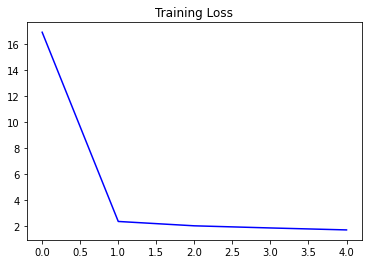

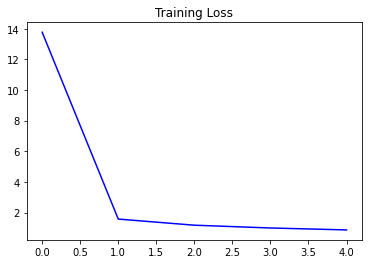

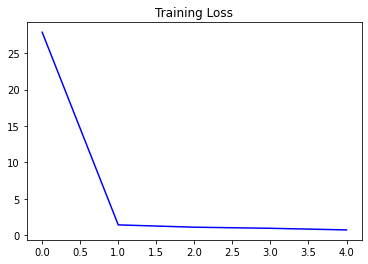

In [ ]:
### VISUALIZATION ###
def training_plot(metrics):
    plt.figure(1)
    plt.plot([m.Train_loss for m in metrics], 'b')
    plt.title('Training Loss')
    plt.show()

training_plot(sgd_trainer.metrics)
training_plot(adam_trainer.metrics)
training_plot(rms_trainer.metrics)


In [ ]:
def init_randn(m):
    if type(m) == nn.Linear:
        m.weight.data.normal_(0,1)

In [ ]:
normalmodel = FashionModel()
normalmodel.apply(init_randn)

FashionModel(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=32, bias=True)
  (fc3): Linear(in_features=32, out_features=10, bias=True)
)

In [ ]:
def init_custom(m):
    if type(m) == nn.Linear:
        rw = torch.randn(m.weight.data.size())
        m.weight.data.copy_(rw)

In [ ]:
def init_xavier(m):
    if type(m) == nn.Linear:
        fan_in = m.weight.size()[1]
        fan_out = m.weight.size()[0]
        std = np.sqrt(2.0 / (fan_in + fan_out))
        m.weight.data.normal_(0,std)

In [ ]:
xaviermodel = FashionModel()
xaviermodel.apply(init_xavier)

FashionModel(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=32, bias=True)
  (fc3): Linear(in_features=32, out_features=10, bias=True)
)

In [ ]:
### LET'S TRAIN ###
n_epochs = 3

print("NORMAL INIT WEIGHTS")
AdamOptimizer = torch.optim.Adam(normalmodel.parameters(), lr=0.001)
normal_trainer = Trainer(normalmodel, AdamOptimizer)
normal_trainer.run(n_epochs)
normal_trainer.save_model('./normal_model.pt')
print('')


print("XAVIER INIT WEIGHTS")
AdamOptimizer = torch.optim.Adam(xaviermodel.parameters(), lr=0.001)
xavier_trainer = Trainer(xaviermodel, AdamOptimizer)
xavier_trainer.run(n_epochs)
xavier_trainer.save_model('./xavier_model.pt')
print('')

NORMAL INIT WEIGHTS
Start Training...
epoch: 1, loss: 132.09046592, Time: 8.569164276123047s
epoch: 2, loss: 31.29398536, Time: 8.821670770645142s
epoch: 3, loss: 17.14701278, Time: 8.73902940750122s

XAVIER INIT WEIGHTS
Start Training...
epoch: 1, loss: 0.53625404, Time: 8.441307067871094s
epoch: 2, loss: 0.38554745, Time: 8.297329187393188s
epoch: 3, loss: 0.34526550, Time: 8.325016736984253s



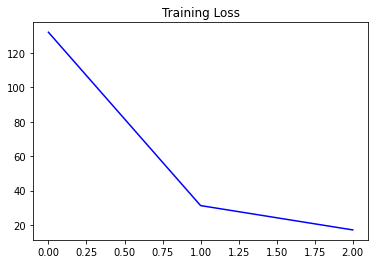

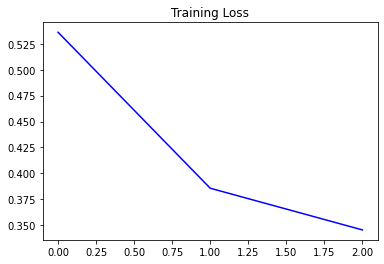

In [ ]:
### VISUALIZATION ###
def training_plot(metrics):
    plt.figure(1)
    plt.plot([m.Train_loss for m in metrics], 'b')
    plt.title('Training Loss')
    plt.show()

training_plot(normal_trainer.metrics)
training_plot(xavier_trainer.metrics)

In [ ]:
alexnet_model = models.alexnet(pretrained=True)

In [ ]:
class BatchNorm(nn.Module):

    def __init__(self, num_features):
        super(BatchNorm, self).__init__()
        self.num_features = num_features
        self.affine = affine
        self.weight = Parameter(torch.Tensor(num_features))
        self.bias = Parameter(torch.Tensor(num_features))
        self.register_buffer('running_mean', torch.zeros(num_features))
        self.register_buffer('running_var', torch.ones(num_features))
        self.reset_parameters()

    def reset_parameters(self):
        self.running_mean.zero_()
        self.running_var.fill_(1)
        self.weight.data.uniform_()
        self.bias.data.zero_()

    def forward(self, x):
        pass

In [ ]:
class FashionModel_Tricks(nn.Module):
    
    def __init__(self):
        super(FashionModel_Tricks, self).__init__()
        self.fc1 = nn.Linear(784, 64)
        self.bnorm1 = nn.BatchNorm1d(64)
        self.dp1 = nn.Dropout(p=0.2)
        self.fc2 = nn.Linear(64, 32)
        self.bnorm2 = nn.BatchNorm1d(32)
        self.dp2 = nn.Dropout(p=0.1)
        self.fc3 = nn.Linear(32, 10)
    
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.dp1(self.bnorm1(x))
        x = F.relu(self.fc2(x))
        x = self.dp2(self.bnorm2(x))
        x = F.log_softmax(self.fc3(x))
        return x
print(FashionModel_Tricks())

FashionModel_Tricks(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (bnorm1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dp1): Dropout(p=0.2, inplace=False)
  (fc2): Linear(in_features=64, out_features=32, bias=True)
  (bnorm2): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dp2): Dropout(p=0.1, inplace=False)
  (fc3): Linear(in_features=32, out_features=10, bias=True)
)


Start Training...


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


epoch: 1, loss: 0.89291437, Time: 9.398805379867554s
epoch: 2, loss: 0.44631836, Time: 8.62048077583313s
epoch: 3, loss: 0.39093523, Time: 11.91435956954956s
epoch: 4, loss: 0.36045060, Time: 8.497564315795898s
epoch: 5, loss: 0.34362725, Time: 8.507379293441772s
epoch: 6, loss: 0.33002892, Time: 8.632154941558838s
epoch: 7, loss: 0.31792234, Time: 8.55519962310791s
epoch: 8, loss: 0.30569105, Time: 8.457276821136475s
epoch: 9, loss: 0.30008908, Time: 8.65641188621521s
epoch: 10, loss: 0.29170487, Time: 8.533376216888428s


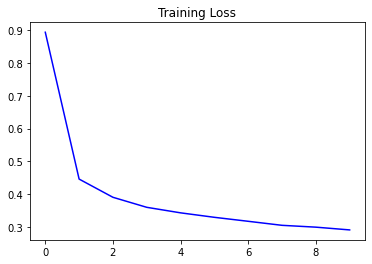

In [ ]:
### TRAIN MODELS WITH BATCHNORM AND DROPOUT ###
n_epochs = 10

model = FashionModel_Tricks()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.001, momentum = 0.9, weight_decay = 0.001)
btrainer = Trainer(model, optimizer)
btrainer.run(n_epochs)
btrainer.save_model('./dropout-batchnorm_optimized_model.pt')

training_plot(btrainer.metrics)

print('')

In [ ]:
torch.nn.utils.clip_grad_norm(model.parameters(), 0.25)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  """Entry point for launching an IPython kernel.


tensor(3.2324)

In [ ]:
def step_decay(epoch):
    initial_lrate = 0.1
    drop = 0.5
    epochs_drop = 10.0
    lrate = initial_lrate * math.pow(drop,  
           math.floor((1+epoch)/epochs_drop))
    return lrate